In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import suraj_datalab as sd

In [7]:
train = pd.read_csv('../input/train.csv', index_col='id')
test = pd.read_csv('../input/test.csv', index_col='id')

train.head()

,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
id,,,,,,,,,
0,F,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11
1,F,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11
2,I,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6
3,M,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10
4,I,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9


In [8]:
test.head()

,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight
id,,,,,,,,
90615,M,0.645,0.475,0.155,1.2380,0.6185,0.3125,0.3005
90616,M,0.580,0.460,0.160,0.9830,0.4785,0.2195,0.2750
90617,M,0.560,0.420,0.140,0.8395,0.3525,0.1845,0.2405
90618,M,0.570,0.490,0.145,0.8740,0.3525,0.1865,0.2350
90619,I,0.415,0.325,0.110,0.3580,0.1575,0.0670,0.1050


In [9]:
print(train.shape)
print(test.shape)

(90615, 9)
(60411, 8)


In [4]:
train.isna().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Whole weight.1    0
Whole weight.2    0
Shell weight      0
Rings             0
dtype: int64

In [10]:
train.nunique()

Sex                  3
Length             157
Diameter           126
Height              90
Whole weight      3175
Whole weight.1    1799
Whole weight.2     979
Shell weight      1129
Rings               28
dtype: int64

In [11]:
train.Sex.value_counts()

Sex
I    33093
M    31027
F    26495
Name: count, dtype: int64

In [12]:
help(sd)

Help on package suraj_datalab:

NAME
    suraj_datalab

PACKAGE CONTENTS
    analyze
    clean
    fold_creator

FILE
    d:\suraj\data science\kaggle\kaggle_env_312\lib\site-packages\suraj_datalab\__init__.py




In [13]:
help(sd.analyze)

Help on module suraj_datalab.analyze in suraj_datalab:

NAME
    suraj_datalab.analyze

FUNCTIONS
    categorical_feature(df, feature, target)
        Calculate the distribution of a categorical feature in a DataFrame with respect to a target variable.
        Parameters:
            df (DataFrame): The input DataFrame.
            feature (str): The name of the categorical feature.
            target (str): The name of the target variable.
        Returns:
            DataFrame: A DataFrame containing the distribution of the feature, including the total count, total percentage,
                       percentages for each target class relative to the total, and percentages of each target class within
                       the feature category.
        Raises:
            None

    is_jupyter_notebook()
        Check if the code is running in a Jupyter notebook environment.

        Returns:
            bool: True if running in a Jupyter notebook or JupyterLab, False otherwise.

    mi

In [19]:
num_cols = train.columns.drop(['Sex', 'Rings'])
num_cols

Index(['Length', 'Diameter', 'Height', 'Whole weight', 'Whole weight.1',
       'Whole weight.2', 'Shell weight'],
      dtype='object')

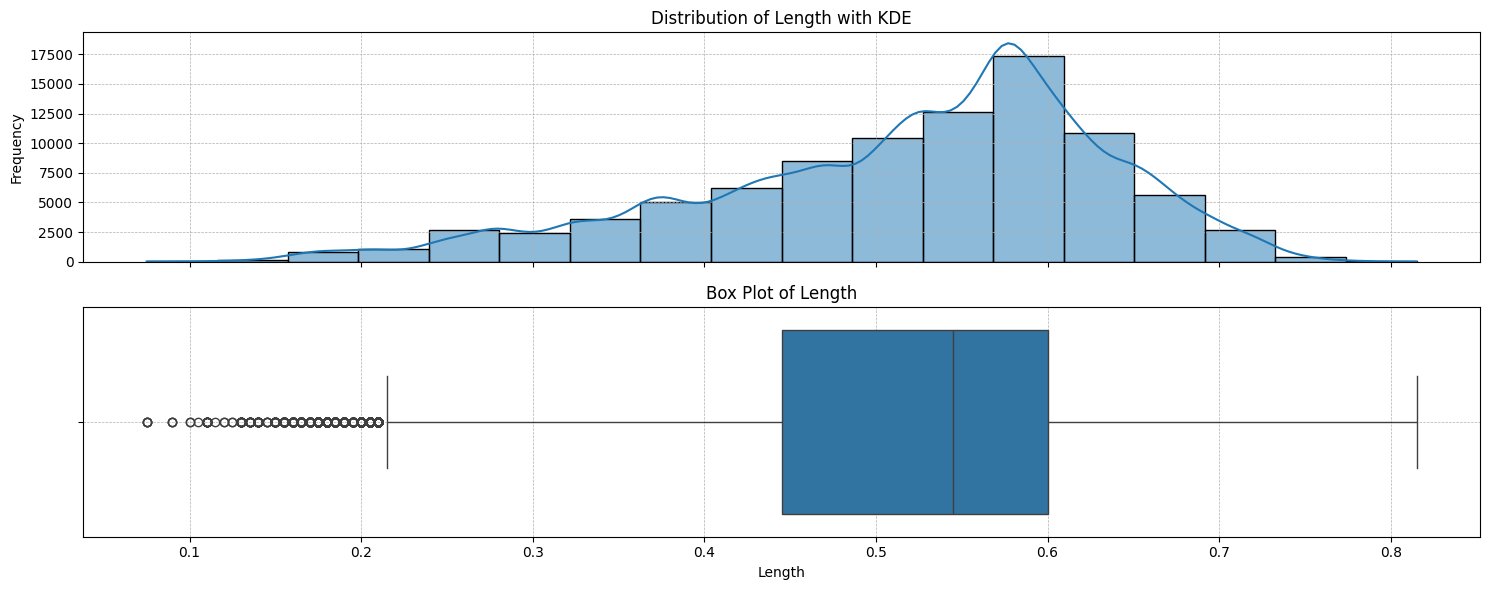

,Outlier Percentage,Lower Outliers Percentage,Upper Outliers Percentage
0,1.611212,1.611212,0.0


,count,mean,std,min,25%,50%,75%,max
Length_Overall,90615.0,0.517098,0.118217,0.075,0.445,0.545,0.6,0.815
Length_Lower_Outliers,1460.0,0.181562,0.022711,0.075,0.170,0.180,0.2,0.210
Length_Upper_Outliers,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


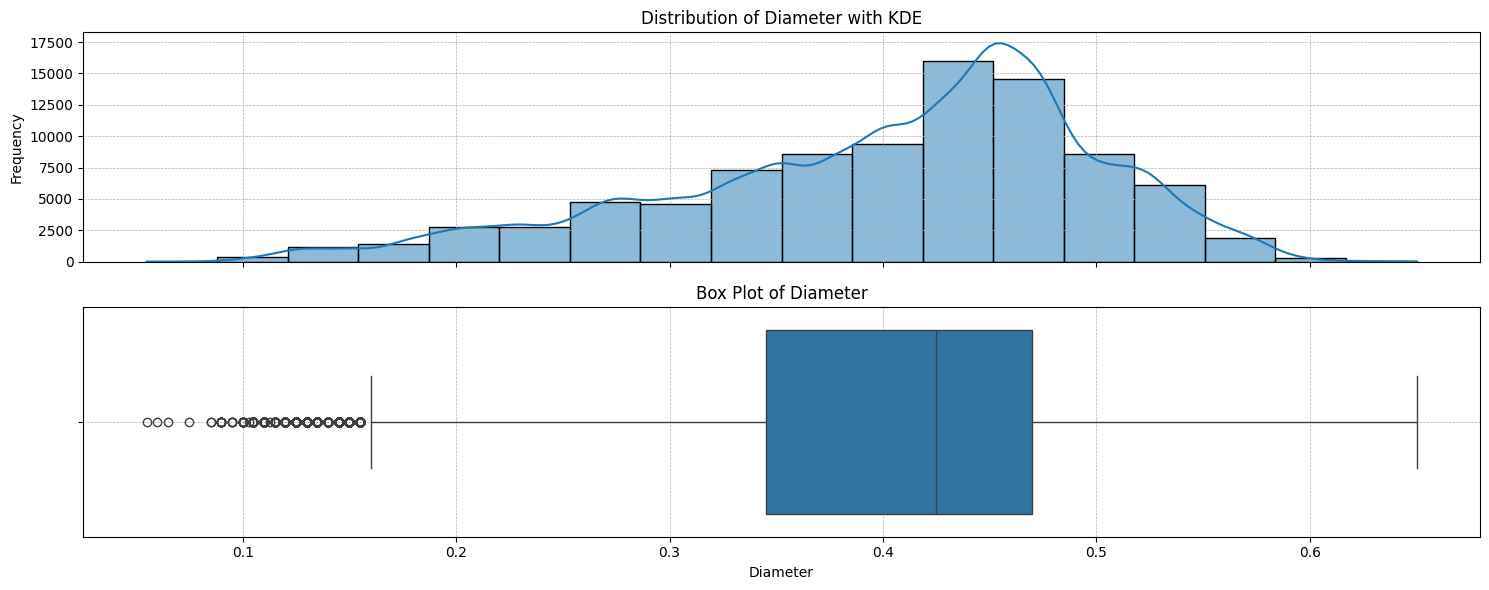

,Outlier Percentage,Lower Outliers Percentage,Upper Outliers Percentage
0,1.743641,1.743641,0.0


,count,mean,std,min,25%,50%,75%,max
Diameter_Overall,90615.0,0.401679,0.098026,0.055,0.345,0.425,0.47,0.650
Diameter_Lower_Outliers,1580.0,0.132846,0.015712,0.055,0.125,0.130,0.15,0.155
Diameter_Upper_Outliers,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


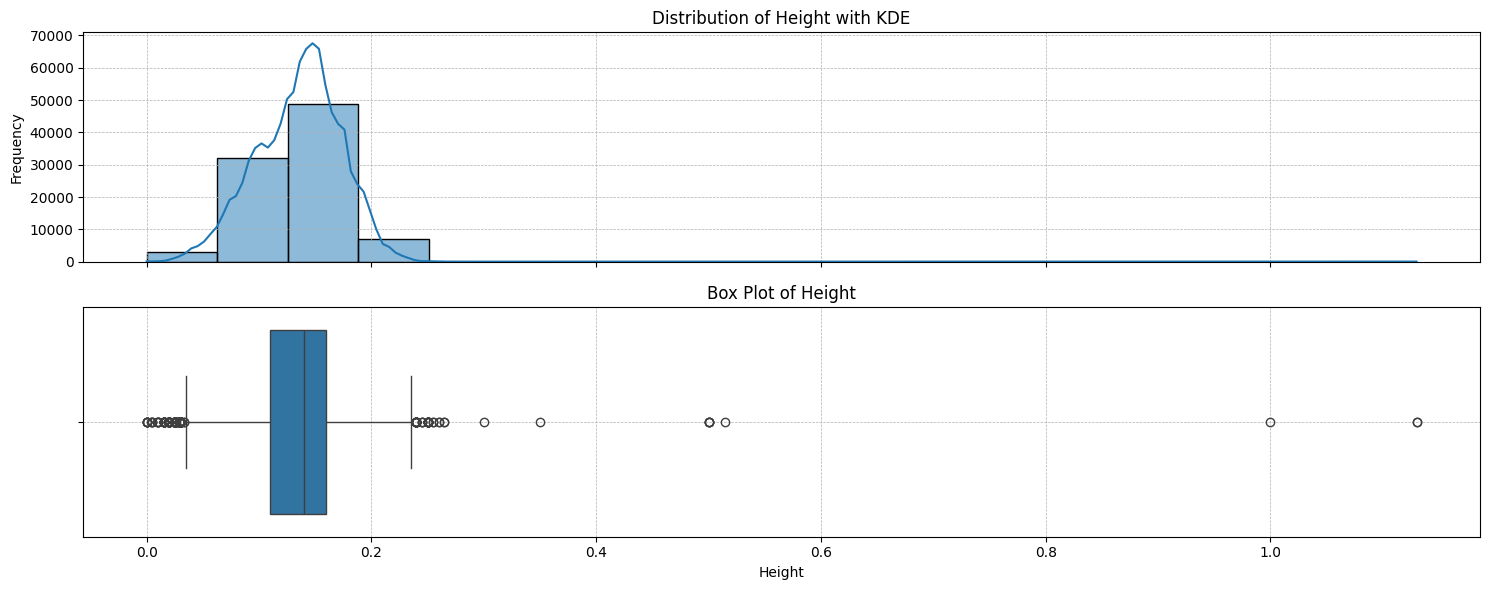

,Outlier Percentage,Lower Outliers Percentage,Upper Outliers Percentage
0,0.384042,0.322242,0.0618


,count,mean,std,min,25%,50%,75%,max
Height_Overall,90615.0,0.135464,0.038008,0.00,0.110,0.140,0.16000,1.130
Height_Lower_Outliers,292.0,0.025147,0.006489,0.00,0.025,0.025,0.03000,0.033
Height_Upper_Outliers,56.0,0.316964,0.199813,0.24,0.240,0.250,0.25625,1.130


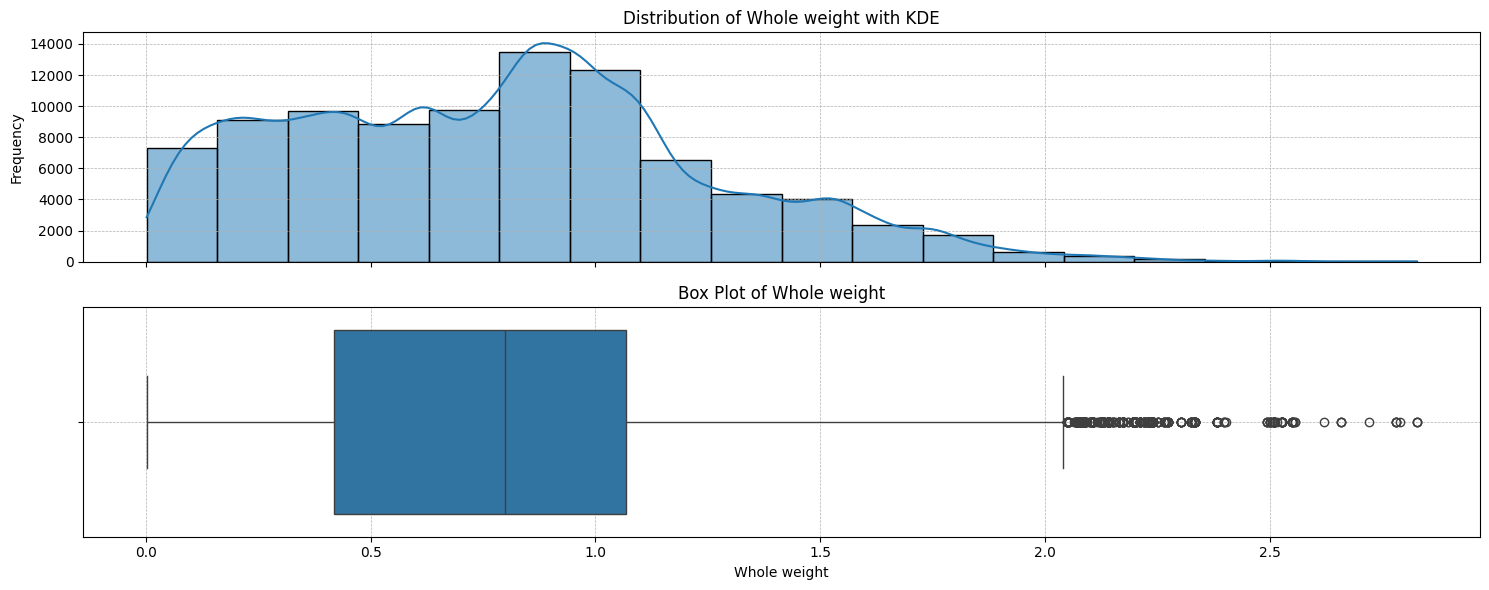

,Outlier Percentage,Lower Outliers Percentage,Upper Outliers Percentage
0,0.633449,0.0,0.633449


,count,mean,std,min,25%,50%,75%,max
Whole weight_Overall,90615.0,0.789035,0.457671,0.0020,0.4190,0.7995,1.0675,2.8255
Whole weight_Lower_Outliers,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Whole weight_Upper_Outliers,574.0,2.204418,0.151846,2.0475,2.0885,2.1650,2.2360,2.8255


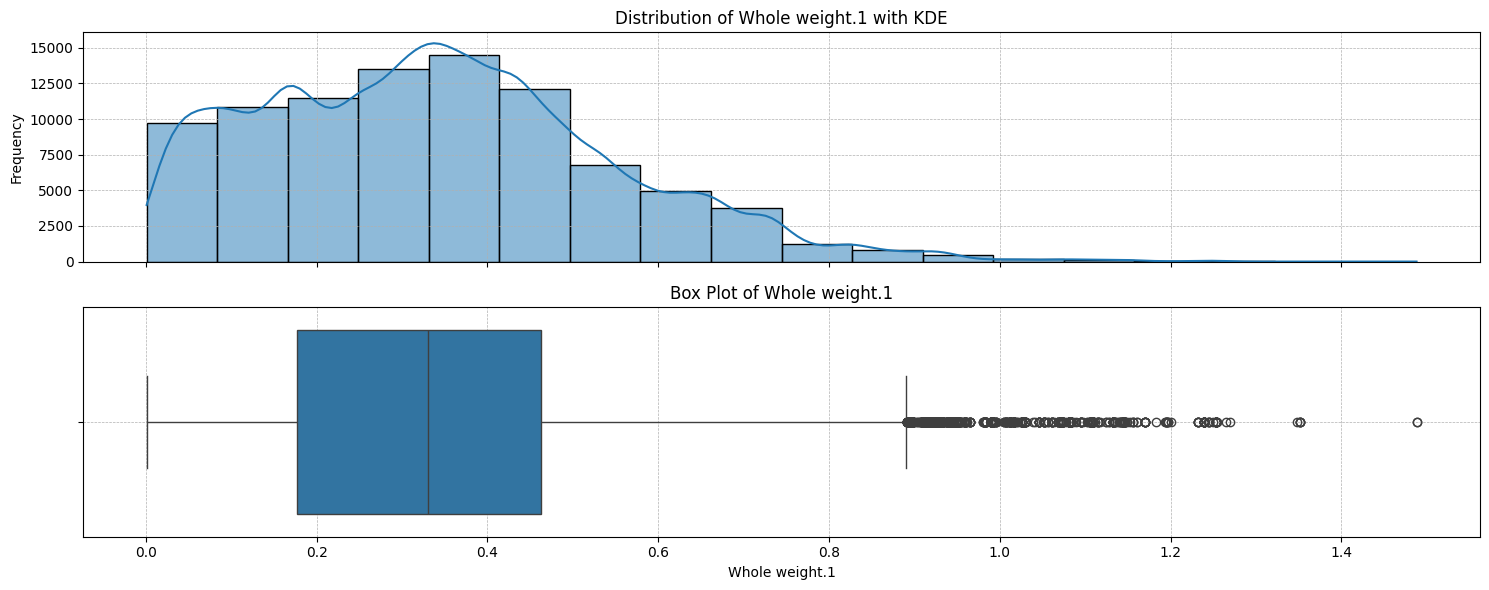

,Outlier Percentage,Lower Outliers Percentage,Upper Outliers Percentage
0,1.067152,0.0,1.067152


,count,mean,std,min,25%,50%,75%,max
Whole weight.1_Overall,90615.0,0.340778,0.204428,0.0010,0.1775,0.3300,0.4630,1.488
Whole weight.1_Lower_Outliers,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Whole weight.1_Upper_Outliers,967.0,0.994109,0.101149,0.8915,0.9205,0.9455,1.0685,1.488


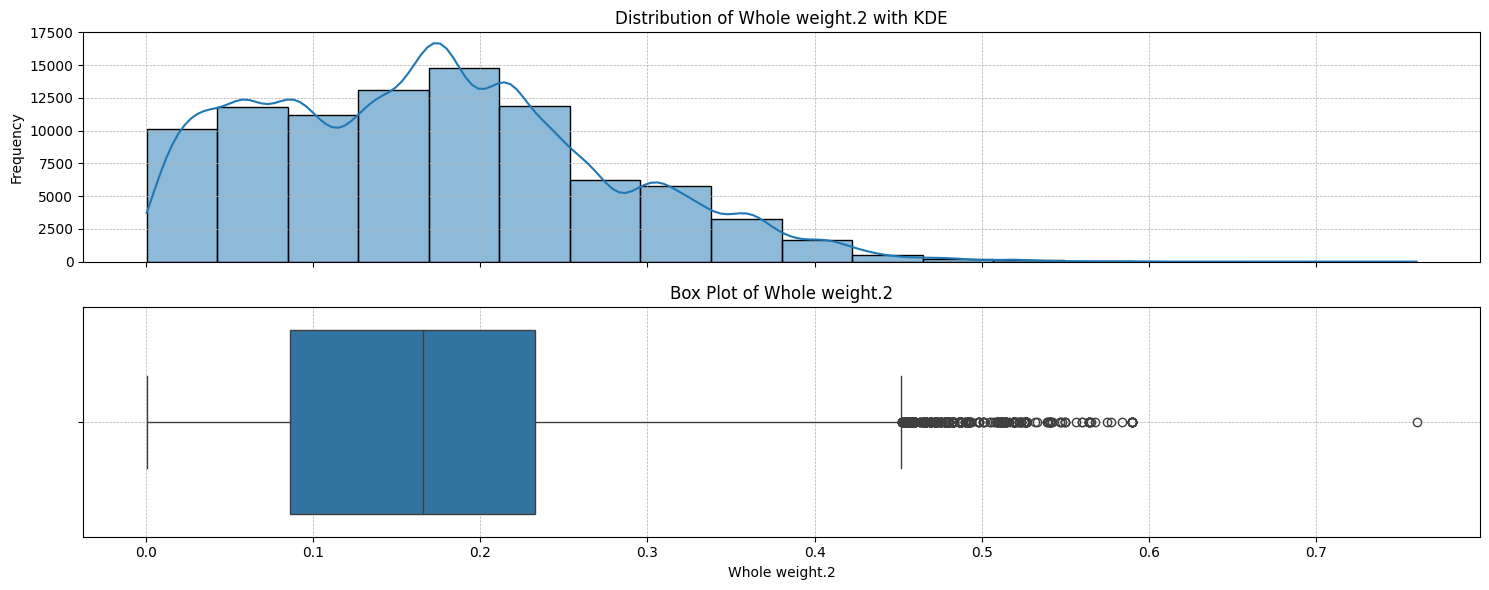

,Outlier Percentage,Lower Outliers Percentage,Upper Outliers Percentage
0,0.485571,0.0,0.485571


,count,mean,std,min,25%,50%,75%,max
Whole weight.2_Overall,90615.0,0.169422,0.100909,0.0005,0.0865,0.1660,0.2325,0.76
Whole weight.2_Lower_Outliers,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Whole weight.2_Upper_Outliers,440.0,0.492005,0.034636,0.4525,0.4665,0.4805,0.5145,0.76


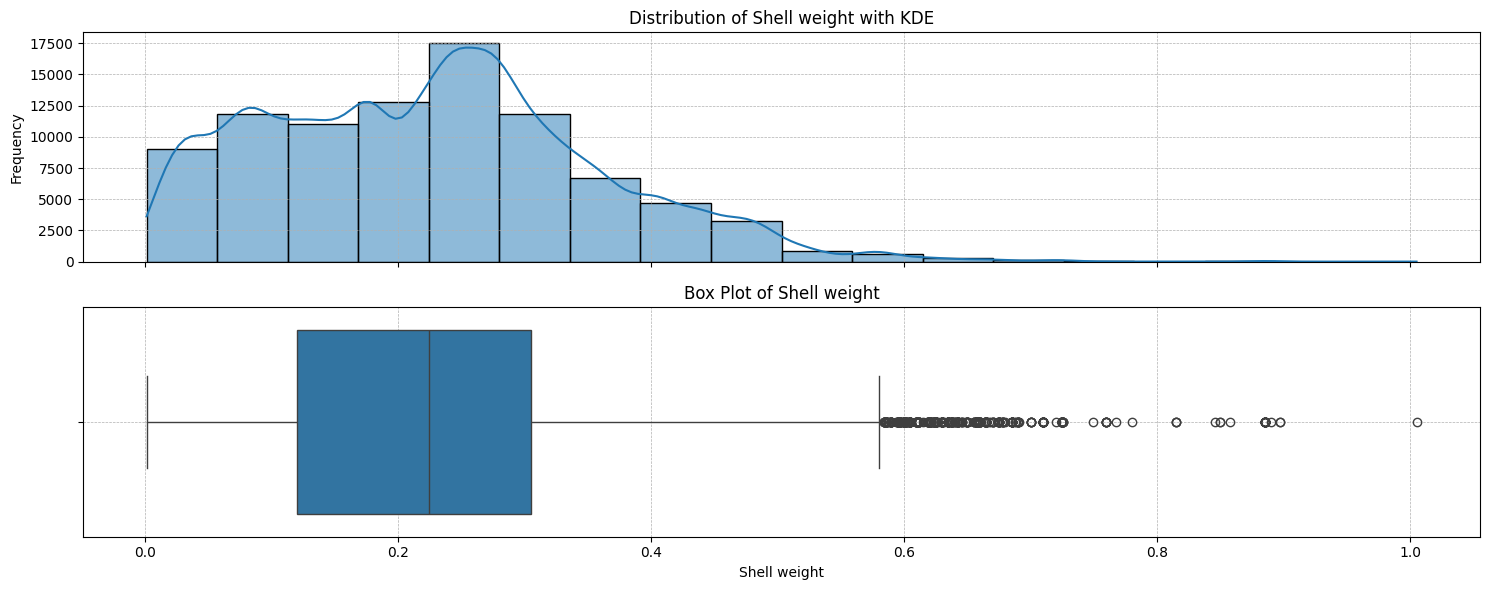

,Outlier Percentage,Lower Outliers Percentage,Upper Outliers Percentage
0,0.740496,0.0,0.740496


,count,mean,std,min,25%,50%,75%,max
Shell weight_Overall,90615.0,0.225898,0.130203,0.0015,0.12,0.225,0.305,1.005
Shell weight_Lower_Outliers,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Shell weight_Upper_Outliers,671.0,0.649388,0.070067,0.5840,0.60,0.625,0.670,1.005


In [21]:
for col in num_cols:
    a, b = sd.analyze.numerical_feature(df=train, feature=col)
    display(a)
    display(b)

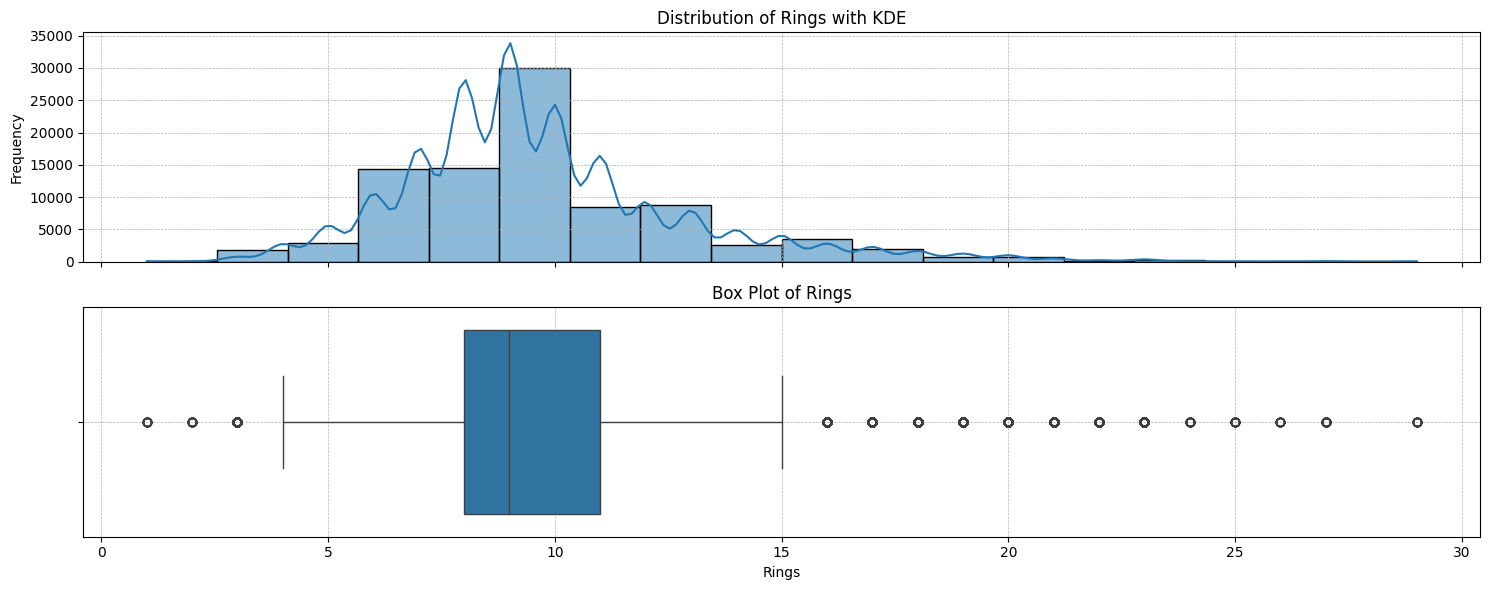

,Outlier Percentage,Lower Outliers Percentage,Upper Outliers Percentage
0,6.317939,0.485571,5.832368


,count,mean,std,min,25%,50%,75%,max
Rings_Overall,90615.0,9.696794,3.176221,1.0,8.0,9.0,11.0,29.0
Rings_Lower_Outliers,440.0,2.820455,0.511409,1.0,3.0,3.0,3.0,3.0
Rings_Upper_Outliers,5285.0,18.151750,2.281243,16.0,16.0,18.0,19.0,29.0


In [42]:
a, b = sd.analyze.numerical_feature(df=train, feature='Rings')
display(a)
display(b)

In [27]:
train.Rings.value_counts().sort_index()

Rings
1        25
2        29
3       386
4      1402
5      2862
6      5411
7      9008
8     14499
9     17465
10    12464
11     8407
12     4719
13     4074
14     2507
15     2072
16     1439
17     1175
18      848
19      639
20      507
21      255
22      108
23      180
24       29
25       22
26       18
27       41
29       24
Name: count, dtype: int64

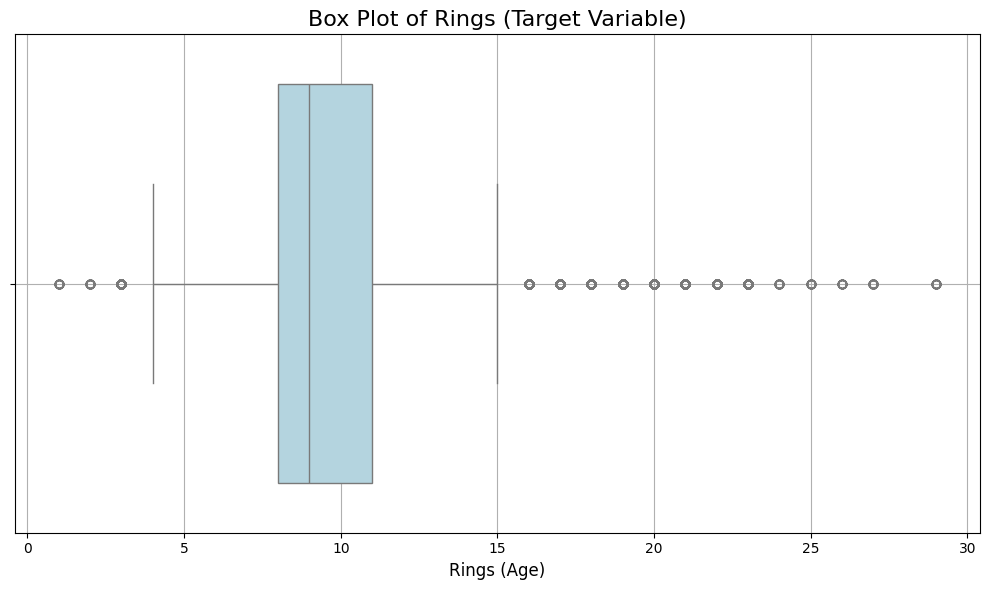

In [34]:
# Create a box plot to visualize the spread and potential outliers in the 'Rings' variable
plt.figure(figsize=(10, 6))
sns.boxplot(x='Rings', data=train, color='lightblue')
plt.title('Box Plot of Rings (Target Variable)', fontsize=16)
plt.xlabel('Rings (Age)', fontsize=12)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


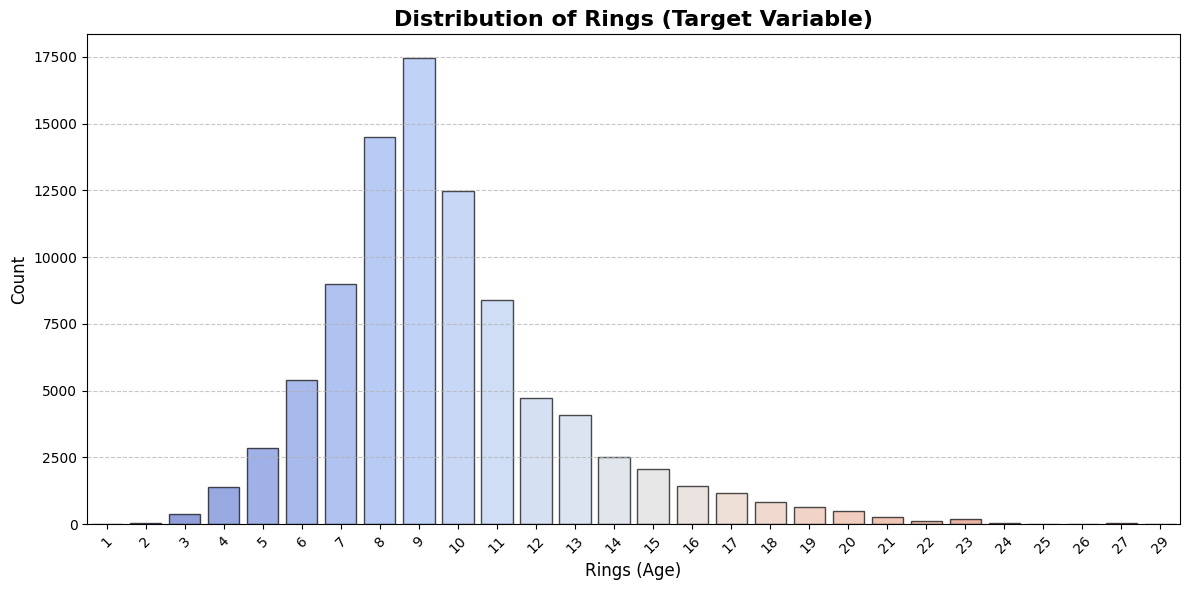

In [39]:
# Improved version of the count plot for 'Rings' with enhancements
plt.figure(figsize=(12, 6))
sns.countplot(data=train, x='Rings', palette='coolwarm', edgecolor='black', hue='Rings', legend=False, alpha=0.7)

# Adding enhanced title and labels
plt.title('Distribution of Rings (Target Variable)', fontsize=16, weight='bold')
plt.xlabel('Rings (Age)', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Add grid to improve readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()

# Show the plot
plt.show()

In [40]:
train.describe()

,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
count,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000
mean,0.517098,0.401679,0.135464,0.789035,0.340778,0.169422,0.225898,9.696794
std,0.118217,0.098026,0.038008,0.457671,0.204428,0.100909,0.130203,3.176221
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.445000,0.345000,0.110000,0.419000,0.177500,0.086500,0.120000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.330000,0.166000,0.225000,9.000000
75%,0.600000,0.470000,0.160000,1.067500,0.463000,0.232500,0.305000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000
